In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras import optimizers
from keras.utils import to_categorical

In [4]:
data=pd.read_csv(r'C:\Datasets\FER\fer2013\fer2013\fer2013.csv')

In [5]:
print(data.columns)
print(data.shape)

Index(['emotion', 'pixels', 'Usage'], dtype='object')
(35887, 3)


In [6]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [7]:
data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

In [8]:
training = data.loc[data["Usage"] == "Training"]
public_test = data.loc[data["Usage"] == "PublicTest"]
private_test = data.loc[data["Usage"] == "PrivateTest"]

print(training.shape)
print(public_test.shape)
print(private_test.shape)

(28709, 3)
(3589, 3)
(3589, 3)


In [9]:
train_labels = training["emotion"]
train_labels = to_categorical(train_labels)

train_pixels = training["pixels"].str.split(" ").tolist()
train_pixels = np.uint8(train_pixels)
train_pixels = train_pixels.reshape((28709, 48, 48, 1))
train_pixels = train_pixels.astype("float32") / 255


private_labels = private_test["emotion"]
private_labels = to_categorical(private_labels)

private_pixels = private_test["pixels"].str.split(" ").tolist()
private_pixels = np.uint8(private_pixels)
private_pixels = private_pixels.reshape((3589, 48, 48, 1))
private_pixels = private_pixels.astype("float32") / 255


public_labels = public_test["emotion"]
public_labels = to_categorical(public_labels)

public_pixels = public_test["pixels"].str.split(" ").tolist()
public_pixels = np.uint8(public_pixels)
public_pixels = public_pixels.reshape((3589, 48, 48, 1))
public_pixels = public_pixels.astype("float32") / 255

In [10]:
model =Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d (AveragePo (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         1

In [12]:
model.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

hist = model.fit(train_pixels, train_labels, batch_size = 256, epochs = 30,
                validation_data = (private_pixels, private_labels))

Epoch 1/30
113/113 [==============================] - 108s 957ms/step - loss: 1.8189 - accuracy: 0.2496 - val_loss: 1.8102 - val_accuracy: 0.2449
Epoch 2/30
113/113 [==============================] - 103s 909ms/step - loss: 1.8021 - accuracy: 0.2534 - val_loss: 1.7675 - val_accuracy: 0.2736
Epoch 3/30
113/113 [==============================] - 99s 880ms/step - loss: 1.7035 - accuracy: 0.3046 - val_loss: 1.6382 - val_accuracy: 0.3424
Epoch 4/30
113/113 [==============================] - 112s 990ms/step - loss: 1.5943 - accuracy: 0.3659 - val_loss: 1.5785 - val_accuracy: 0.3812
Epoch 5/30
113/113 [==============================] - 120s 1s/step - loss: 1.5157 - accuracy: 0.4072 - val_loss: 1.4819 - val_accuracy: 0.4257
Epoch 6/30
113/113 [==============================] - 113s 1s/step - loss: 1.4426 - accuracy: 0.4436 - val_loss: 1.4812 - val_accuracy: 0.4285
Epoch 7/30
113/113 [==============================] - 104s 923ms/step - loss: 1.3868 - accuracy: 0.4664 - val_loss: 1.3675 - val_ac

In [8]:
model.save('FER.h5')

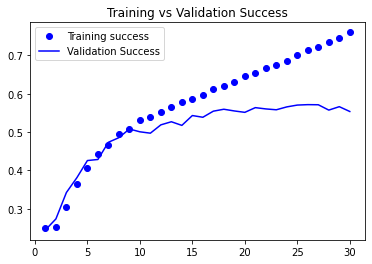

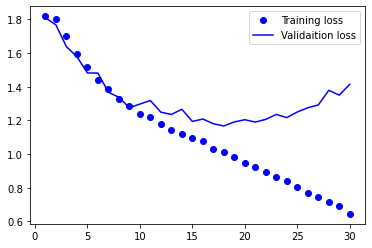

In [13]:
acc = hist.history["accuracy"]
val_acc = hist.history["val_accuracy"]
loss = hist.history["loss"]
val_loss = hist.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label = "Training success")
plt.plot(epochs, val_acc, "b", label = "Validation Success")
plt.title("Training vs Validation Success")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validaition loss")
plt.legend()


plt.show()